In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
import imageio

## Import danych

In [2]:
przystanki=pd.read_csv('data/all_stops.csv', error_bad_lines=False)
przystanki.head()
#przystanki.loc[przystanki.ID==410804]

,ID,STREET_NAME,X,Y,BUS_TRAM_NO
0,100101,"Ul./Pl.: Targowa,",21.044827,52.248455,"['123', '125', '138', '146', '147', '166', '20..."
1,100102,"Ul./Pl.: Targowa,",21.044443,52.249078,"['138', '166', '509', 'N21', '509^']"
2,100103,"Ul./Pl.: Targowa,",21.043983,52.248998,"['3', '6', '7', '9^', '22^', '24^', '25', '26']"
3,100104,"Ul./Pl.: Targowa,",21.041726,52.249905,"['3', '6', '13', '20^', '23^', '25', '26', '28']"
4,100106,"Ul./Pl.: Kijowska,",21.043710,52.250008,"['3^', '6^', '7', '9^', '13', '20^', '22^', '2..."


In [3]:
# merge po ID i FROM potem groupby po LINE_NUMBER potem magia, numery linii na inty jeśli się da może try catch na inta i jeśli mniejszy niż 100 to tramwaj
linie=pd.read_csv('data/all_lines.csv', error_bad_lines=False)
linie.head()

,LINE_NUMBER,FROM,TO,FROM_STREET_NAME,TO_STREET_NAME
0,1,410804,410803,"Banacha,","Banacha,"
1,1,410803,400503,"Banacha,","Bitwy Warszawskiej 1920 r.,"
2,1,400503,400403,"Bitwy Warszawskiej 1920 r.,","Och-Teatr,"
3,1,400403,412103,"Och-Teatr,","Wawelska,"
4,1,412103,400307,"Wawelska,","pl.Narutowicza,"


In [4]:
linie['LINE_NUMBER'].unique()

array(['1', '2', '3', '4', '6', '7', '9', '10', '11', '13', '14', '15',
       '17', '18', '20', '22', '23', '24', '25', '26', '27', '28', '31',
       '33', '35', '41', '102', '103', '104', '105', '107', '108', '109',
       '110', '111', '112', '114', '115', '116', '117', '118', '119',
       '120', '121', '122', '123', '124', '125', '126', '127', '128',
       '129', '130', '131', '132', '133', '134', '135', '136', '138',
       '139', '140', '141', '142', '143', '145', '146', '147', '148',
       '149', '150', '151', '152', '153', '154', '155', '156', '157',
       '158', '159', '160', '161', '162', '163', '164', '165', '166',
       '167', '168', '169', '170', '171', '172', '173', '174', '175',
       '176', '177', '178', '179', '180', '181', '182', '183', '184',
       '185', '186', '187', '188', '189', '190', '191', '192', '193',
       '194', '195', '196', '197', '198', '199', '200', '201', '202',
       '203', '204', '206', '207', '208', '209', '210', '211', '212',
       '213

## Podział sieci na warstwy

In [5]:
tram_lines = ['1', '2', '3', '4', '6', '7', '9', '10', '11', '13', '14', '15',
       '17', '18', '20', '22', '23', '24', '25', '26', '27', '28', '31',
       '33', '35', '41']

In [6]:
ztm=linie.merge(przystanki[['ID','X','Y']], left_on='FROM', right_on='ID')
ztm['gps'] = list(zip(ztm.X, ztm.Y))
ztm_trams = ztm.loc[(ztm.LINE_NUMBER.isin(tram_lines))]
ztm_bus = ztm.loc[~(ztm.LINE_NUMBER.isin(tram_lines))]

In [7]:
# zmieniłam tę komórkę na tę wyżej żeby nie wycinać nocnych autobusów ^

# ztm=linie.merge(przystanki[['ID','X','Y']], left_on='FROM', right_on='ID')
# ztm['gps'] = list(zip(ztm.X, ztm.Y))
# ztm.head()
# for z in ztm:    
#    ztm.LINE_NUMBER=pd.to_numeric(ztm.LINE_NUMBER, errors='coerce')
# ztm_trams=ztm.loc[ztm.LINE_NUMBER<100]
# ztm_bus=ztm.loc[(ztm.LINE_NUMBER>100)]

In [8]:
ztm_bus['LINE_NUMBER'].unique()

array(['169', '135', '160', '190', 'N16', 'N21', 'N61', 'N66', 'N71',
       'N14', 'N45', 'N95', '102', '523', '173', '311', '158', 'N24',
       '111', '117', '146', '147', '507', 'N72', '127', '107', '116',
       '178', '180', '222', '503', '518', '175', 'N44', '103', '114',
       '156', '203', '250', '409', '712', 'N02', 'N46', '121', '303',
       '397', 'N41', 'N91', '321', '136', '104', '118', '132', '414',
       '204', '314', '105', '249', '112', 'N42', '743', '197', '713',
       'N52', '194', '716', '109', '155', '167', '128', 'N64', '162',
       '119', '131', '159', '185', 'N31', 'N33', 'N83', '108', 'N11',
       '192', '331', '139', '200', '217', '251', '339', '166', '402',
       'N03', '501', '171', 'N12', 'N13', 'N62', '110', 'N01', 'N43',
       '213', '123', '411', '140', '120', '240', '256', '145', '269',
       '500', '134', '326', '705', '735', '122', '201', '189', '184',
       '126', '176', '115', '143', '196', '225', '183', '514', '125',
       '142', '161',

In [9]:
#ztm_trams[['ID','gps']].to_dict()
#trams_dict=ztm_trams[['ID','gps']].set_index('ID').T.apply(tuple).to_dict()
trams_dict=ztm_trams.set_index('ID')[['X', 'Y']].T.apply(tuple).to_dict()
buses_dict=ztm_bus.set_index('ID')[['X', 'Y']].T.apply(tuple).to_dict()

#### Warstwa sieci: Tramwaje - wszystkie linie

C:\Users\kspalinska\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


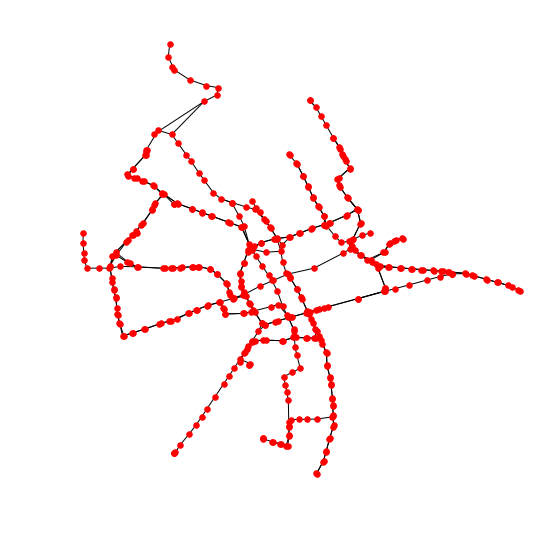

In [10]:
#ztm_trams=ztm_trams[ztm_trams.TO!=108703]
trams = nx.DiGraph()
# t1=ztm.iloc[1:2,:]
# t2=ztm.iloc[21:22,:]
# t2

# #trams.add_node('Banacha',pos=(t1.X,t1.Y))
# #trams.add_node('Narutowicza',pos=(t2.X.iloc[0],t2.Y.iloc[0]))
# #trams.add_edge('Banacha','Narutowicza')
# #pos=nx.get_node_attributes(trams,'pos')
# #nx.draw(trams,pos)

# pos
# t1['X'].iloc[0]
# ztm_trams.head()


trams.add_nodes_from(trams_dict.keys())

src=ztm_trams.loc[(ztm_trams.FROM.isin(ztm_trams.ID)) ,'FROM']
dst=ztm_trams.loc[(ztm_trams.TO.isin(ztm_trams.ID)) ,'TO']
ztm_trams_filtered=ztm_trams[(ztm_trams["TO"].isin(dst.values) & ztm_trams['FROM'].isin(src.values))]

trams.add_edges_from(list(zip(ztm_trams_filtered['FROM'].values, ztm_trams_filtered['TO'].values)))
# for k, v in trams_dict.items():
#     trams.add_edges_from(([(k, t) for t in v]))


# pos=nx.get_node_attributes(trams,'pos')
# pos

for n, p in trams_dict.items():
    trams.nodes[n]['pos'] = p

#trams1=nx.DiGraph(trams_dict)
plt.figure(figsize=(7, 7))
nx.draw(trams,trams_dict,node_size=30, arrows=False)
plt.show()

#### Warstwa sieci: Autobusy - wszystkie linie

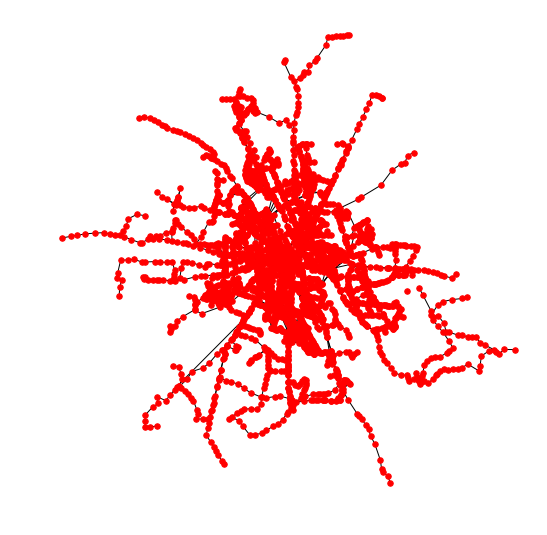

In [11]:
#ztm_trams=ztm_trams[ztm_trams.TO!=108703]
buses = nx.DiGraph()
# t1=ztm.iloc[1:2,:]
# t2=ztm.iloc[21:22,:]
# t2

# #trams.add_node('Banacha',pos=(t1.X,t1.Y))
# #trams.add_node('Narutowicza',pos=(t2.X.iloc[0],t2.Y.iloc[0]))
# #trams.add_edge('Banacha','Narutowicza')
# #pos=nx.get_node_attributes(trams,'pos')
# #nx.draw(trams,pos)

# pos
# t1['X'].iloc[0]
# ztm_trams.head()


buses.add_nodes_from(buses_dict.keys())

src=ztm_bus.loc[(ztm_bus.FROM.isin(ztm_bus.ID)) ,'FROM']
dst=ztm_bus.loc[(ztm_bus.TO.isin(ztm_bus.ID)) ,'TO']
ztm_bus_filtered=ztm_bus[(ztm_bus["TO"].isin(dst.values) & ztm_bus['FROM'].isin(src.values))]

buses.add_edges_from(list(zip(ztm_bus_filtered['FROM'].values, ztm_bus_filtered['TO'].values)))
# for k, v in trams_dict.items():
#     trams.add_edges_from(([(k, t) for t in v]))


# pos=nx.get_node_attributes(trams,'pos')
# pos

for n, p in buses_dict.items():
    buses.nodes[n]['pos'] = p

#trams1=nx.DiGraph(trams_dict)
plt.figure(figsize=(7, 7))
nx.draw(buses,buses_dict,node_size=30, arrows=False)
plt.show()

## Charakterystyki warstw sieci

Statystyki wczytane z pliku .py na podstawie projektu 4

In [12]:
from statistics import stats

In [13]:
# graf - tramwaje
trams = nx.DiGraph()
trams.add_nodes_from(trams_dict.keys())

src=ztm_trams.loc[(ztm_trams.FROM.isin(ztm_trams.ID)) ,'FROM']
dst=ztm_trams.loc[(ztm_trams.TO.isin(ztm_trams.ID)) ,'TO']
ztm_trams_filtered=ztm_trams[(ztm_trams["TO"].isin(dst.values) & ztm_trams['FROM'].isin(src.values))]

trams.add_edges_from(list(zip(ztm_trams_filtered['FROM'].values, ztm_trams_filtered['TO'].values)))

In [14]:
stats(trams)

N: 436
E: 449
knn: 1.0400943396226414


C:\Users\kspalinska\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\kspalinska\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


corr: 0.20052355137906347
avg_dist: 8.362496045555204


{'N': 436,
 'E': 449,
 'knn': 1.0400943396226414,
 'corr': 0.20052355137906347,
 'avg_dist': 8.362496045555204}

In [15]:
# graf - autobusy
buses = nx.DiGraph()
buses.add_nodes_from(buses_dict.keys())

src=ztm_bus.loc[(ztm_bus.FROM.isin(ztm_bus.ID)) ,'FROM']
dst=ztm_bus.loc[(ztm_bus.TO.isin(ztm_bus.ID)) ,'TO']
ztm_bus_filtered=ztm_bus[(ztm_bus["TO"].isin(dst.values) & ztm_bus['FROM'].isin(src.values))]

buses.add_edges_from(list(zip(ztm_bus_filtered['FROM'].values, ztm_bus_filtered['TO'].values)))

In [ ]:
stats(buses)

N: 3367
E: 3947
knn: 1.2317361950826278
corr: 0.22992332469015261


Średnia odległość w warstwie autobusów nie zdążyła się policzyć w skończonym czasie.

### Wczytanie danych o liniach w konkretne dni

Dane z dni od 1 stycznia 2016 do 10 stycznia 2016 (po drodze święto 1 i 6 stycznia i soboty 2 i 9)

In [12]:
lines = {}
day_lines = {}
night_lines = {}

for i in range(1,11):
    print(i)
    lines[i] = pd.read_csv('data/stops_days_01_' + str(i) + '.txt', delimiter='   ', engine='python')
    lines_of_day = lines[i]['timetable_type'].unique()
    print(lines_of_day)
    day_lines[i] = lines[i].loc[~lines[i]['timetable_type'].isin([i for i in lines_of_day if i.startswith('N')])]
    night_lines[i] = lines[i].loc[lines[i]['timetable_type'].isin([i for i in lines_of_day if i.startswith('N')])]

1
['DS' 'NO' 'NP' 'NS' 'N5']
2
['SB' 'DS' 'NO' 'NP' 'NS' 'N6']
3
['DS' 'NO' 'NS']
4
['DP' 'NO' 'NS']
5
['DP' 'NO' 'N2' 'NS']
6
['DS' 'NO' 'NS']
7
['DP' 'NO' 'NS']
8
['DP' 'NO' 'NP' 'NS' 'N5']
9
['SB' 'DS' 'NO' 'NP' 'NS' 'N6']
10
['DS' 'D7' 'NO' 'NS']


In [13]:
lines[9].loc[lines[9]['timetable_type'].isin(day_lines[9]['timetable_type'].unique())]['line'].unique()

array(['1', '2', '3', '4', '6', '7', '9', '10', '11', '13', '14', '15',
       '17', '18', '20', '22', '23', '24', '25', '26', '27', '28', '31',
       '33', '35', '101', '102', '103', '104', '105', '107', '108', '109',
       '110', '111', '112', '114', '115', '116', '117', '118', '119',
       '120', '121', '122', '123', '124', '125', '126', '127', '128',
       '129', '131', '132', '133', '134', '135', '136', '138', '139',
       '141', '142', '143', '145', '146', '147', '148', '149', '151',
       '152', '153', '154', '155', '156', '157', '158', '159', '160',
       '161', '162', '163', '164', '165', '166', '167', '168', '169',
       '170', '171', '172', '173', '174', '175', '176', '177', '178',
       '179', '180', '181', '182', '183', '184', '185', '186', '187',
       '188', '189', '190', '191', '192', '193', '194', '195', '196',
       '197', '198', '199', '201', '202', '203', '204', '205', '206',
       '207', '208', '209', '211', '212', '213', '216', '217', '218',
       '21

In [14]:
night_lines[9]['timetable_type'].unique()

array(['NO', 'NP', 'NS', 'N6'], dtype=object)

### Autobusy - animacja na kolejnych dniach i nocach

In [15]:
for i in range(1,11):
    for daytime, day in zip([day_lines, night_lines], (True, False)):

        buses = nx.DiGraph()

        filtered_bus_numbers = lines[i].loc[lines[i]['timetable_type'].
                                            isin(daytime[i]['timetable_type'].unique())]['line'].unique()

        filtered_ztm_bus = ztm_bus.loc[ztm_bus['LINE_NUMBER'].isin(filtered_bus_numbers)]
        filtered_buses_dict=filtered_ztm_bus.set_index('ID')[['X', 'Y']].T.apply(tuple).to_dict()
        buses.add_nodes_from(filtered_buses_dict.keys())

        src = filtered_ztm_bus.loc[(filtered_ztm_bus.FROM.isin(filtered_ztm_bus.ID)) ,'FROM']
        dst = filtered_ztm_bus.loc[(filtered_ztm_bus.TO.isin(filtered_ztm_bus.ID)) ,'TO']
        final_ztm_bus = filtered_ztm_bus[(filtered_ztm_bus["TO"].isin(dst.values) & filtered_ztm_bus['FROM'].isin(src.values))]

        buses.add_edges_from(list(zip(final_ztm_bus['FROM'].values, final_ztm_bus['TO'].values)))


        for n, p in filtered_buses_dict.items():
            buses.nodes[n]['pos'] = p
        
        
        plt.figure(figsize=(7, 7))
        nx.draw(buses,filtered_buses_dict,node_size=30, arrows=False)
        if day:
            plt.title("Day "+str(i))
            plt.savefig("pictures/day_"+str(i)+'.png', bbox_inches='tight')
        else:
            plt.title("Night "+str(i))
            plt.savefig("pictures/night_"+str(i)+'.png', bbox_inches='tight')
        plt.close()

C:\Users\kspalinska\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [16]:
gif_path = "result.gif"
day_frames_path = "pictures/day_{i}.png"
night_frames_path = "pictures/night_{i}.png"

with imageio.get_writer(gif_path, mode='I', duration=1.5) as writer:
    for i in range(1,11):
        writer.append_data(imageio.imread(day_frames_path.format(i=i)))
        writer.append_data(imageio.imread(night_frames_path.format(i=i)))

-----

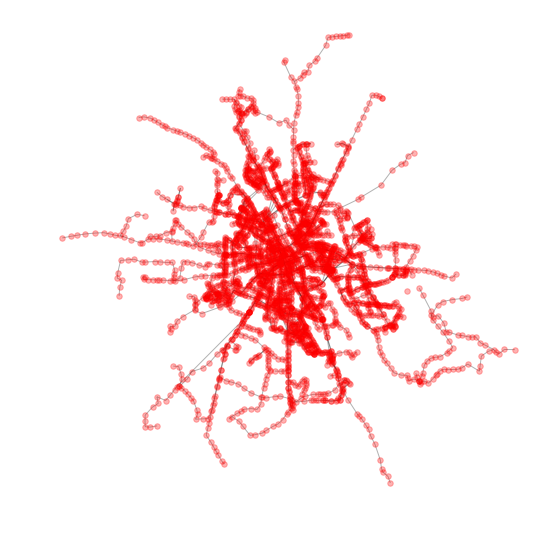

In [17]:
buses = nx.DiGraph()

buses.add_nodes_from(buses_dict.keys())
src=ztm_bus.loc[(ztm_bus.FROM.isin(ztm_bus.ID)) ,'FROM']
dst=ztm_bus.loc[(ztm_bus.TO.isin(ztm_bus.ID)) ,'TO']
ztm_bus_filtered=ztm_bus[(ztm_bus["TO"].isin(dst.values) & ztm_bus['FROM'].isin(src.values))]

buses.add_edges_from(list(zip(ztm_bus_filtered['FROM'].values, ztm_bus_filtered['TO'].values)))

for n, p in buses_dict.items():
    buses.nodes[n]['pos'] = p

#trams1=nx.DiGraph(trams_dict)
plt.figure(figsize=(7, 7))
nx.draw(buses,buses_dict,node_size=30, arrows=False, node_color='red', alpha=.3)
plt.show()


# zad 6

In [18]:
#src=ztm_bus.loc[ztm_bus.FROM.isin(ztm_bus.ID) ,'FROM']
#src=ztm_trams.loc[(ztm_trams.FROM.isin(ztm_trams.ID)) ,'FROM']
#ztm_bus[ztm_bus.ID==107702]
ztm_bus.head()

,LINE_NUMBER,FROM,TO,FROM_STREET_NAME,TO_STREET_NAME,ID,X,Y,gps
156,169,107102,107702,"Bródnowska,","rondo Żaba,",107102,21.038481,52.264222,"(21.038481, 52.264222)"
182,135,107101,129201,"Bródnowska,","Szymanowskiego,",107101,21.038261,52.263766,"(21.038261, 52.263766)"
190,160,100303,116301,"Dw.Wileński,","Park Praski,",100303,21.033248,52.254118,"(21.033248, 52.254118)"
191,190,100303,116301,"Dw.Wileński,","Park Praski,",100303,21.033248,52.254118,"(21.033248, 52.254118)"
197,160,116301,704702,"Park Praski,","Stare Miasto,",116301,21.029576,52.252548,"(21.029576000000002, 52.252548)"


In [19]:
#ztm_trams=ztm_trams[ztm_trams.TO!=108702]
107702 
#ztm_trams.loc[ztm_trams.ID==108702]
#ztm_trams['FROM'].iloc()[0]
src=ztm_trams.loc[(ztm_trams.FROM.isin(ztm_trams.ID)) ,'FROM']
src

dst=ztm_trams.loc[(ztm_trams.TO.isin(ztm_trams.ID)) ,'TO']
dst.values

ztm_trams_filtered=ztm_trams[(ztm_trams["TO"].isin(dst.values) & ztm_trams['FROM'].isin(src.values))]
ztm_trams_filtered.shape

(797, 9)

# Scenariusz do sprawdzenia

jakiś tam numer zadania


In [41]:
from math import  radians, sqrt, sin, cos
from math import atan2

def coord2meters (lat1, lon1, lat2,  lon2):
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    
    a = sin((lat2-lat1) / 2)**2 + cos(lat1) * cos(lat2) * sin((lon2-lon1) / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = 6373 * c

    print("Result:", distance)
    return (distance)

In [40]:
#test
coord2meters(przystanki.loc[4].X,przystanki.loc[4].Y,przystanki.loc[1].X,przystanki.loc[1].Y)

Result: 0.12636543218239762
Should be: 278.546 km


21.04371

In [62]:
central_station_lon= 52.22882 
central_station_lat=21.00287
przystanki['dist']=przystanki.apply(lambda row : coord2meters(central_station_lat,central_station_lon,row['X'], row['Y']), axis=1)
#[1 if (coord2meters(central_station_lat,przystanki.X ,central_station_lon, przystanki.Y)<=0.5) else 0]


Result: 5.092702005823149
Result: 5.080029152292286
Result: 5.030035759480592
Result: 4.844763646482887
Result: 5.047260773012878
Result: 5.055260095185213
Result: 5.082162337269632
Result: 5.082162337269632
Result: 4.59655443582568
Result: 4.634152151100057
Result: 4.604543085009635
Result: 4.582886351214268
Result: 4.532728534193613
Result: 4.453066098784124
Result: 4.474680188964821
Result: 4.279797373440563
Result: 4.600795133022025
Result: 4.297249163703148
Result: 4.474577909080532
Result: 4.4427251562965635
Result: 4.0593512026562175
Result: 4.0552807713704455
Result: 4.062107376593581
Result: 4.01660545541877
Result: 4.022227199275977
Result: 4.110271852479195
Result: 4.303368354436374
Result: 4.515662769594195
Result: 4.560702593261894
Result: 4.204290562752595
Result: 4.182769137616358
Result: 4.2121219040029665
Result: 4.061289817855879
Result: 4.055589798538359
Result: 4.057349646803498
Result: 4.074006645200618
Result: 4.0902766896722325
Result: 4.0984822230861235
Result: 

Result: 20.507378984538658
Result: 20.51209471081576
Result: 21.430720454254033
Result: 21.30402703092172
Result: 17.836908192084188
Result: 17.814633101846795
Result: 17.98654182444672
Result: 18.020888194745567
Result: 18.237201101481226
Result: 18.185383074909403
Result: 18.857725627071467
Result: 18.70172079099706
Result: 19.366103301157988
Result: 19.370487814663523
Result: 19.156838858265186
Result: 19.180852799115705
Result: 19.8960853933572
Result: 20.14584519479688
Result: 20.461031264457887
Result: 20.479338753990643
Result: 21.066457266254602
Result: 21.291892489588808
Result: 21.655968740056586
Result: 21.644799560217496
Result: 22.029694268744706
Result: 22.151021314804503
Result: 22.635039141149818
Result: 16.31528177227524
Result: 16.246396979196902
Result: 16.79526667146584
Result: 16.72630494910159
Result: 17.44131528390084
Result: 17.33207873785751
Result: 17.168843144522086
Result: 17.33783901835319
Result: 17.92868010394203
Result: 17.83849645508574
Result: 17.77294

Result: 15.31406230347822
Result: 15.175358036779748
Result: 15.053778190403333
Result: 15.08137676596265
Result: 13.640017958782803
Result: 13.625428689314196
Result: 15.350985196855014
Result: 5.204043242514223
Result: 5.232042239467346
Result: 5.347261603837599
Result: 5.314560434112619
Result: 5.613889593046719
Result: 5.526996873784877
Result: 5.759374899413746
Result: 5.444871811358809
Result: 5.939844783614443
Result: 5.820768312493382
Result: 5.771839295010547
Result: 5.7569799976120395
Result: 6.467528400584813
Result: 6.22372285354469
Result: 6.25649680956216
Result: 6.424903199940099
Result: 6.7589782584021805
Result: 7.124938788187995
Result: 7.2030076270572145
Result: 7.137835251758867
Result: 7.595758635504958
Result: 7.410208029452727
Result: 8.170774574123758
Result: 8.204824028996962
Result: 7.96102954303862
Result: 7.990573882500831
Result: 8.830116449985365
Result: 8.722604701387333
Result: 8.839763793813766
Result: 8.850941583079923
Result: 8.828992548835188
Result:

Result: 22.82562240271273
Result: 22.937754344145596
Result: 23.5236287045846
Result: 23.83202166381448
Result: 24.637257559485715
Result: 24.477037554452025
Result: 24.452538936862744
Result: 24.47890648636085
Result: 24.597447568759296
Result: 6.277014438817526
Result: 6.375462199352018
Result: 9.404925118286252
Result: 9.518142798880564
Result: 6.7450721999836105
Result: 6.86213432414136
Result: 6.9903171271550155
Result: 7.0187963895158605
Result: 6.678737915131733
Result: 14.71312053523717
Result: 14.870088927849572
Result: 14.815538531239936
Result: 11.543167650529835
Result: 11.589072545401654
Result: 15.767932481534332
Result: 14.252135392485231
Result: 14.369072804329193
Result: 14.580988975431888
Result: 14.670332302852968
Result: 16.21945548095428
Result: 16.199658205665006
Result: 10.081405333121833
Result: 10.044349841955068
Result: 10.110719746862138
Result: 10.075780065844466
Result: 10.003886750970162
Result: 10.087633982478103
Result: 10.005438722531675
Result: 9.95498

Result: 20.763656952432605
Result: 21.248321985075115
Result: 21.358598563681248
Result: 21.80684363002618
Result: 21.903624784031557
Result: 22.715855277677434
Result: 22.741010475474887
Result: 23.2712509524048
Result: 23.551433146843333
Result: 24.2959235889289
Result: 24.39260596336613
Result: 25.094527663973647
Result: 25.199168110504157
Result: 25.97605309476805
Result: 26.081189521992243
Result: 23.3764602865138
Result: 23.137562874768633
Result: 23.218782440438037
Result: 22.136075465815985
Result: 21.943423442010527
Result: 23.139296255777435
Result: 23.14058068127744
Result: 23.03206551909363
Result: 23.019689549917448
Result: 26.691685914029307
Result: 26.739920733596577
Result: 27.445985492997828
Result: 27.51476117616815
Result: 28.61043189279559
Result: 28.627064291651447
Result: 28.93161851191595
Result: 28.93708639682622
Result: 29.08334057601746
Result: 29.186360739478538
Result: 29.833547881222078
Result: 29.737059949018533
Result: 30.42478477667684
Result: 30.6020131

TypeError: '(0       False
1       False
2       False
3       False
4       False
        ...  
5407    False
5408    False
5409    False
5410    False
5411    False
Name: dist, Length: 5412, dtype: bool, slice(None, None, None))' is an invalid key

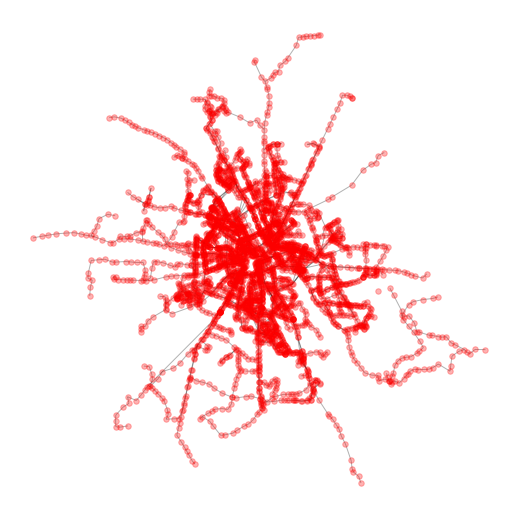

In [103]:

terrorist_attack_data=przystanki[(przystanki.dist>1)]
len(terrorist_attack_data)


ztm_pwnd=linie.merge(terrorist_attack_data[['ID','X','Y','dist']], left_on='FROM', right_on='ID')
ztm_pwnd['gps'] = list(zip(ztm_pwnd.X, ztm_pwnd.Y))
pwnd_dict=ztm_pwnd.set_index('ID')[['X', 'Y']].T.apply(tuple).to_dict()

attack = nx.DiGraph()

attack.add_nodes_from(pwnd_dict.keys())
src=ztm_pwnd.loc[(ztm_pwnd.FROM.isin(ztm_pwnd.ID)) ,'FROM']
dst=ztm_pwnd.loc[(ztm_pwnd.TO.isin(ztm_pwnd.ID)) ,'TO']
ztm_pwnd_filtered=ztm_pwnd[(ztm_pwnd["TO"].isin(dst.values) & ztm_pwnd['FROM'].isin(src.values))]

attack.add_edges_from(list(zip(ztm_pwnd_filtered['FROM'].values, ztm_pwnd_filtered['TO'].values)))

for n, p in pwnd_dict.items():
    attack.nodes[n]['pos'] = p

#trams1=nx.DiGraph(trams_dict)
plt.figure(figsize=(7, 7))
nx.draw(attack,pwnd_dict,node_size=30, arrows=False, node_color='red', alpha=.3)
plt.show()


In [104]:
# tu se policzymy czy ta sieć jest "spójna" i jaka jest średnia ścieżka i powiemy, że się jest/nie jest przygotowana na atak terrorystow